# Otimização de funções na prática

## Exemplo 1: minimize a função $f(x)=2+(x-5)^2$ pelo método do Gradient Descent.

### Prepararação:

In [1]:
#Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Definindo a nossa função
def f(x):
    return 2+(x-5)**2

In [5]:
#Testando a função para alguns valores
print("x=0 >>> f(0)=",f(0))
print("x=-1 >>> f(-1)=",f(-1))
print("x=5 >>> f(5)=",f(5))
print("x=10 >>> f(10)=",f(10))

x=0 >>> f(0)= 27
x=-1 >>> f(-1)= 38
x=5 >>> f(5)= 2
x=10 >>> f(10)= 27


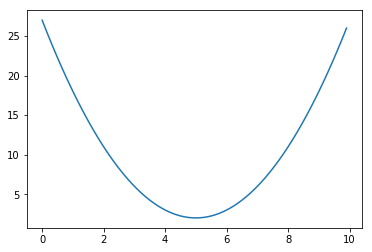

In [6]:
#Desenhando o gráfico da função
t = np.arange(0., 10., 0.1)
plt.plot(t, f(t))
plt.show()

In [7]:
#Definindo a derivada da nossa função
def df(x):
    return 2*(x-5)

In [8]:
#Testando a derivada da função para alguns valores
print("x=0 >>> f'(0)=",df(0))
print("x=-1 >>> f'(-1)=",df(-1))
print("x=5 >>> f'(5)=",df(5))
print("x=10 >>> f'(10)=",df(10))

x=0 >>> f'(0)= -10
x=-1 >>> f'(-1)= -12
x=5 >>> f'(5)= 0
x=10 >>> f'(10)= 10


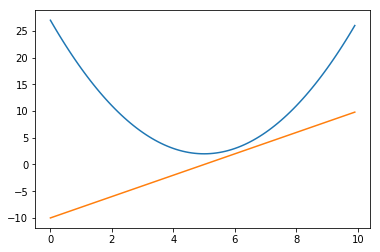

In [9]:
#Desenhando a função a sua derivada 
#(a função está em azul e a derivada está em laranja)

#É possível perceber que a derivada é igual a 
#zero bem no ponto em que temos o mínimo na funçao f(x)

t = np.arange(0., 10., 0.1)
plt.plot(t, f(t))
plt.plot(t, df(t))
plt.show()

### Aplicando o algoritmo do Grandient Descent

In [10]:
#Definindo x inicial, nossa Learning Rate e o número de updates (epochs)
x=-5 
learning_rate=0.001
epochs=10000

#Criando matrix (ordem epochs X 4) para o armazenamento dos resultados
E=np.zeros((epochs, 4))

#Loop para nossos updates
for i in range(epochs):
    E[i,0]=i #armazenamento das epochs
    E[i,1]=x #armazenamento do x
    E[i,2]=f(x) #armazenamento do f(x)
    E[i,3]=df(x) #armazenamento do f'(x)
    
    x=x-learning_rate*df(x) #update

#Printando nosso x final (x=x*), f(x*) e f'(x*)
print(x,f(x),df(x))

4.999999979797138 2.0000000000000004 -4.040572321173386e-08


### É possível observar que o x convergiu para 5 e a derivada f(x*) é nula (lembre-se que o computador quase nunca retorno o valor exato e quase sempre uma aproximação numérica).

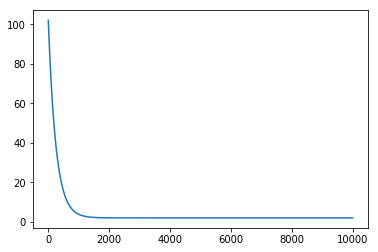

In [11]:
#Desenhando o gráfico para verificarmos a convergência. 

#É possível perceber que com menos de 
#2000 epochs conseguiríamos um resultado muito similar.

plt.plot(E[:,0], E[:,2])
plt.show()

### Exercício 1: minimize a função $g(x)=ln(x^2+1)$ pelo método do Gradient Descent. Tente fazer sem copiar o código!!! (lembre que $ln(x)=log_{e}x$)

## Exemplo 2: minimize a função $f(x,y)=x^2+y^2$ pelo método do Gradient Descent.

### Prepararação:

In [15]:
#Importando as livrarias necessárias
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#Definindo a nossa função
def f(x,y):
    return x**2+y**2

In [17]:
#Definindo o vetor gradiente da nossa função
def df(x,y):
    return np.array([2*x,2*y])

### Aplicando o algoritmo do Grandient Descent

In [18]:
#Definindo z=(x,y) inicial, nossa Learning Rate e o número de updates (epochs)
z=np.array(np.random.randn(2)) #Começando com um par x, y aleatório com distribuição 
                               #normal com média nula e covariância identidade

learning_rate=0.001
epochs=10000

#Criando matrix (ordem epochs X 4) para o armazenamento dos resultados
E=np.zeros((epochs, 2))

#Loop para nossos updates
for i in range(epochs):
    E[i,0]=i #armazenamento das epochs
    E[i,1]=f(z[0],z[1]) #armazenamento do f(x)
    z=z-learning_rate*df(z[0],z[1]) #update

#Printando nosso (x,y) final ((x,y)=(x*,y*), f((x*,y*)) e f'((x*,y*))
print(z)
print(f(z[0],z[1]))
print(df(z[0],z[1]))

[  2.14314264e-09   4.12534237e-09]
2.16115100451e-17
[  4.28628529e-09   8.25068473e-09]


### É possível observar que o z=(x, y) convergiu para (0, 0) e o vetor gradiente é nulo (lembre-se que o computador quase nunca retorno o valor exato e quase sempre uma aproximação numérica).

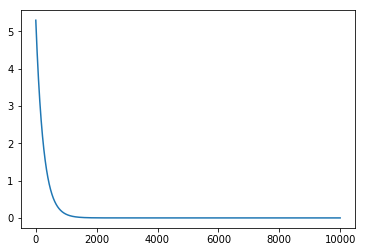

In [19]:
#Desenhando o gráfico para verificarmos a convergência.

#É possível perceber que com menos de 
#2000 epochs conseguiríamos um resultado muito similar.

plt.plot(E[:,0], E[:,1])
plt.show()

### Exercício 2: minimize a função $g(x,y)=ln(x^2+y^2+10)$ pelo método do Gradient Descent. Tente fazer sem copiar o código!!! (lembre que $ln(x)=log_{e}x$)

## Exemplo 3: encontre a função $f(x)$ que melhor se adapte aos pontos dispersos. Suponha que a função estimada seja da forma $f(x)=wx$ e que $w$ seja tal que minimize o Erro Quadrático Médio. Esse método é chamado de Mínimos Quadrados e é muito usado no campo do Machine Learning.

In [26]:
#Importando as livrarias necessárias
import numpy as np
import matplotlib.pyplot as plt

In [27]:
#Inputando os dados de Temperatura Vs. Qtd. de Sorvetes vendidos
x=[20,22,25,33,28,29,35]
y=[50,65,75,100,90,110,130]

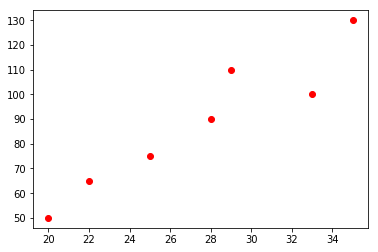

In [28]:
#Plotando gráfico (scatter)
plt.plot(x,y,'ro')
plt.show()

In [29]:
#Transformando os dados em arrays do Numpy
x=np.array(x)
y=np.array(y)

In [30]:
#Definindo a função f(x), o EQM e sua derivada em relação a w.
def f(x):
    return w*x

def EQM(x, y, w):
    N=y.shape[0]
    return (1/N)*np.inner(y-f(x), y-f(x))

def dEQM(x, y, w):
    N=y.shape[0]
    return (1/N)*-2*np.inner(y-f(x), x)

In [31]:
#Definindo w inicial, nossa Learning Rate e o número de updates (epochs)

w=np.random.randn(1) #w inicial aleatório proveniente de uma N(0,1)
learning_rate=0.001
epochs=20
E=np.zeros((epochs, 3))

for i in range(epochs):
    E[i,0]=i
    E[i,1]=EQM(x,y,w)
    E[i,2]=dEQM(x,y,w)
    w=w-learning_rate*dEQM(x,y,w)

print("O w estimado é", w[0])

O w estimado é 3.27915273695


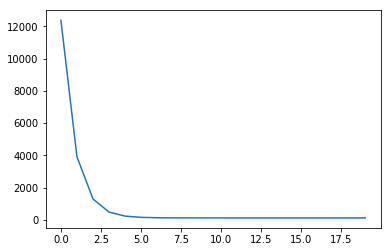

In [32]:
#Nesse caso específico é possível ver que o 
#EQM foi reduzido e convergiu rapidamente

plt.plot(E[:,0], E[:,1])
plt.show()

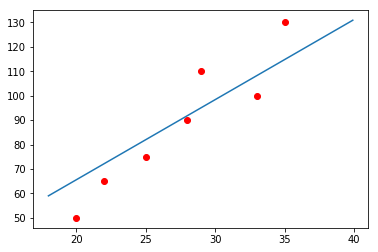

In [33]:
#Agora vamos plotar a nuvem de pontos novamente, 
#mas agora com a reta ajustada entre os pontos.

t = np.arange(18, 40, 0.1)
plt.plot(x,y,'ro')
plt.plot(t, w*t)
plt.show()

### Exercício 3: resolva o mesmo problema do Exemplo 3, no entanto, suponha que a função estimada seja da forma $g(x)=wx+b$ e que $(w,b)$ seja tal que minimize o Erro Quadrático Médio. 